# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# import dataset saved in google drive
from google.colab import drive
drive.mount("/content/drive")

# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

Mounted at /content/drive


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
df.shape

(1898, 9)

#### Observations:


The data includes 1,898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# info() function will print a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


order_id and customer_id are stored as integers. restaurant_name and cuisine_type are strings. cost_of_the_order is a float. day_of_the_week and rating are strings. food_preparation_time and delivery_time are integers.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# isnull() returns True if a null value is found,
# sum() will show the number of null values in each column

df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


According to the info() function results above, all columns include 1,898 non-null entries, so there are no missing values in the dataset. The isnull() function confirms that there are no null values in any column.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# describe() function will give a statistical summary of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


*   Minimum: 20 mins
*   Maximum: 35 mins
*   Average: 27 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# value_counts() can be used to see the order# in each category

df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


736 orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**order_id**

In [10]:
# nunique() confirms that order_id column contains all unique values

df['order_id'].nunique()

1898

**customer_id**

In [11]:
# nunique() checks how many unique customer_ids there are

df['customer_id'].nunique()

1200

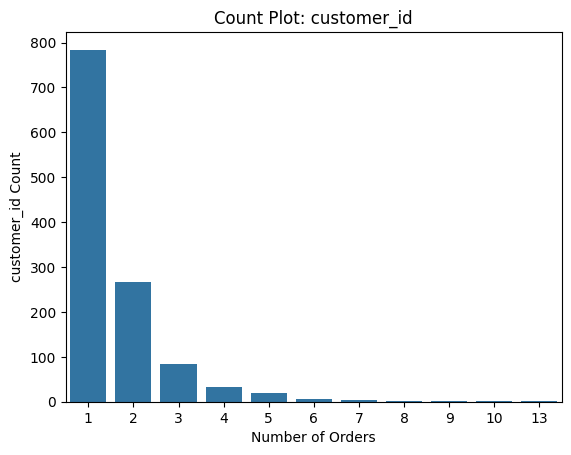

In [12]:
# using the value_counts function,
# we can see how many of the orders were placed by unique customers
# vs. customers who placed multiple orders

plt.title('Count Plot: customer_id')
plt.ylabel('customer_id Count')
plt.xlabel('Number of Orders')
sns.countplot(data=df, x=df.customer_id.value_counts());

Based on this plot, we can observe that the majority of the 1,200 unique customers placed only one order during this time period. Of the repeat customers, ~280 of them placed 2 orders, and a small number (under 100) placed 5 or more orders.

**restaurant_name**

In [13]:
# nunique() checks how many unique restaurants there are

df['restaurant_name'].nunique()

178

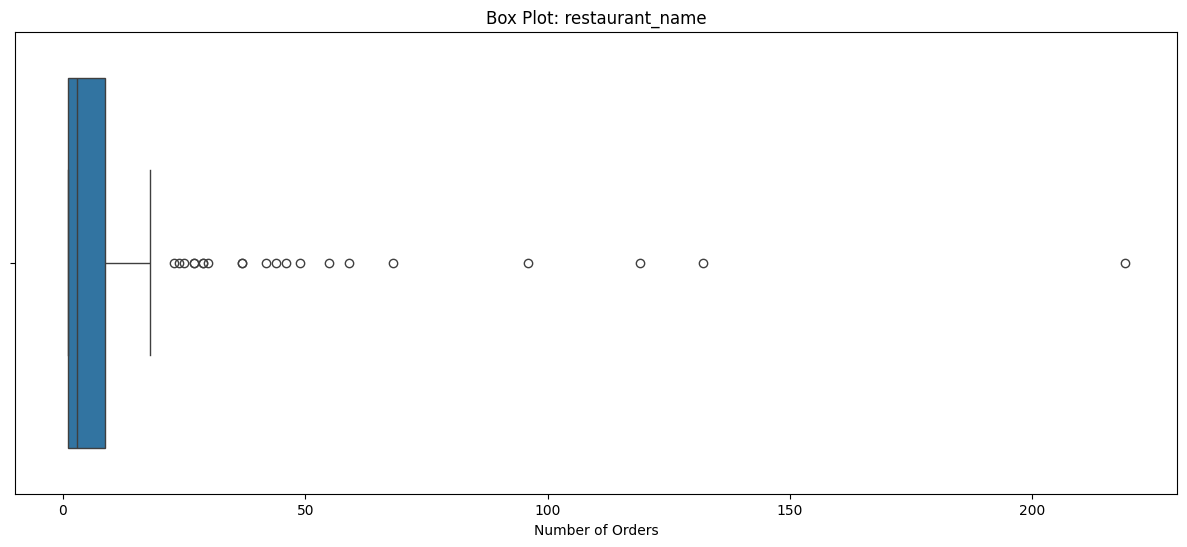

In [14]:
# using the value_counts function,
# we can see the distribution of how many orders came from each restaurant

plt.figure(figsize=(15,6))
plt.title('Box Plot: restaurant_name')
plt.xlabel('Number of Orders')
sns.boxplot(data=df, x=df.restaurant_name.value_counts());

Based on this plot, we can see a large discrepancy between the majority of restaurants, which fulfilled around 1-10 orders each, and the most popular restaurants, clear outliers with 100+ orders.

**cuisine_type**

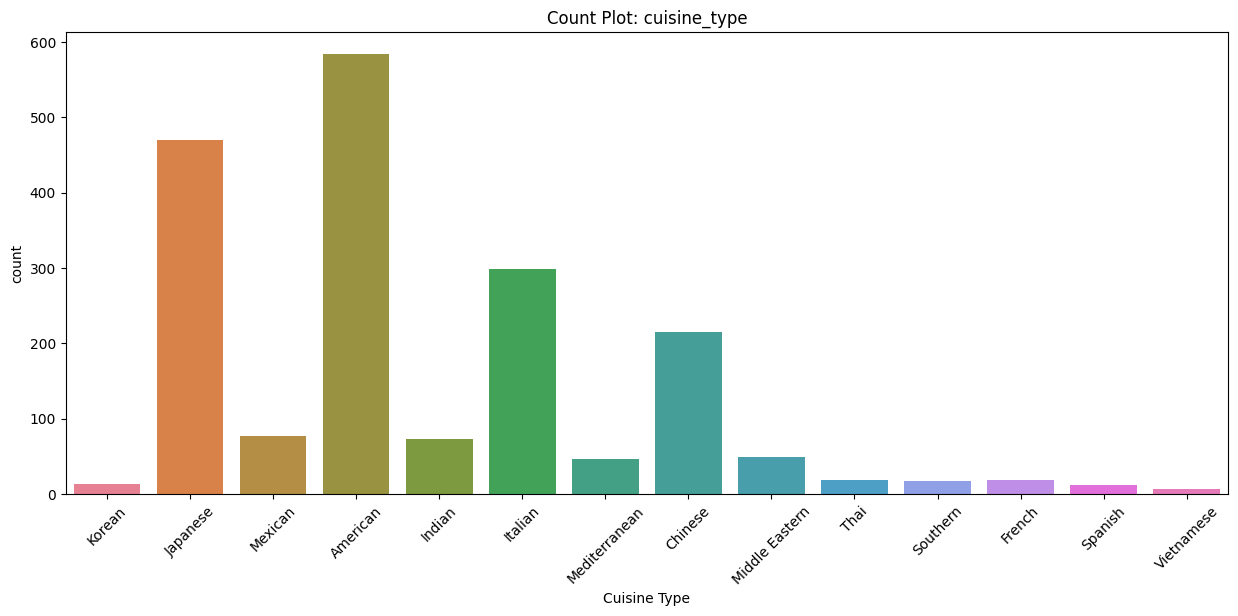

In [15]:
# as cuisine_type is a categorical variable,
# we can use a countplot to show the distribution of types of orders

plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.countplot(data=df, x=df.cuisine_type, hue=df.cuisine_type)
plt.title('Count Plot: cuisine_type')
plt.xlabel('Cuisine Type');

Based on this plot, we can see that American cuisine was the most popular, followed by Japanese and Italian.

**cost_of_the_order**

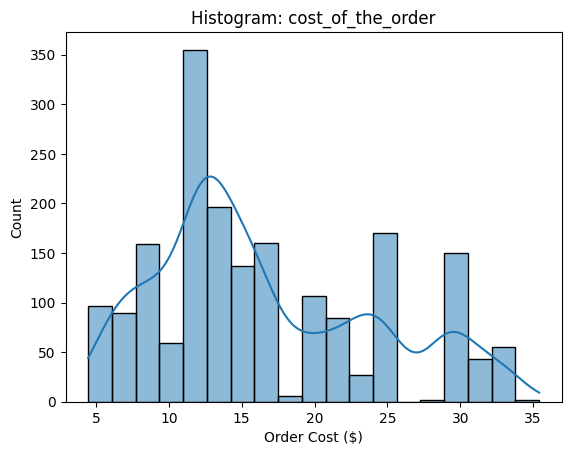

In [16]:
# cost_of_the_order is a continuous variable,
# so we can create a histogram to observe the distribution

sns.histplot(data=df, x=df.cost_of_the_order, kde=True)
plt.title('Histogram: cost_of_the_order')
plt.xlabel('Order Cost ($)');

The distribution of order cost is skewed slightly to the right, with a mode occuring in the 10-15 dollar range and smaller peaks at 25 and 30 dollars.

**day_of_the_week**

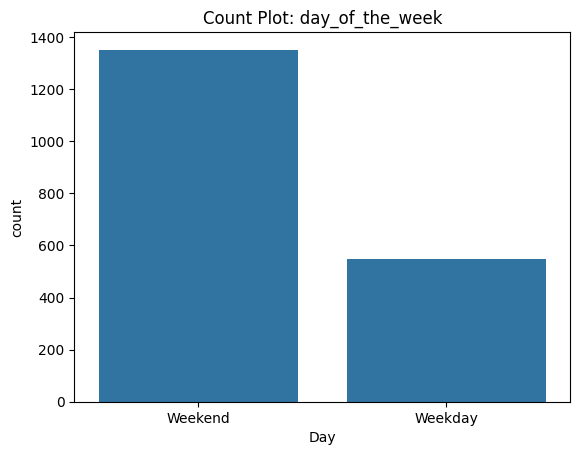

In [17]:
# day_of_the_week is a categorical variable,
# so we can use a count plot to compare weekends vs. weekdays

sns.countplot(data=df, x=df.day_of_the_week)
plt.title('Count Plot: day_of_the_week')
plt.xlabel('Day');

Based on this view, we can observe that over twice as many orders were placed on weekends as opposed to weekdays.

**rating**

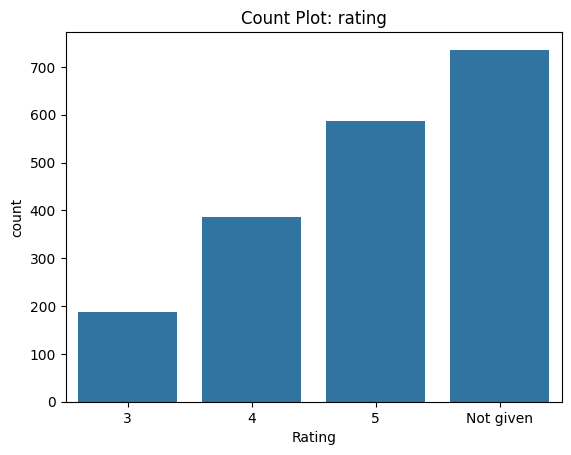

In [18]:
# rating is another categorical variable,
# so we can use a count plot again

sns.countplot(data=df, x=df.rating, order=('3','4','5','Not given'))
plt.title('Count Plot: rating')
plt.xlabel('Rating');

Based on this plot, we can see that the orders generally received positive ratings, with 3 being the lowest and 5 being more common. However, a significant number of orders (700+) did not receive a rating.

**food_preparation_time**

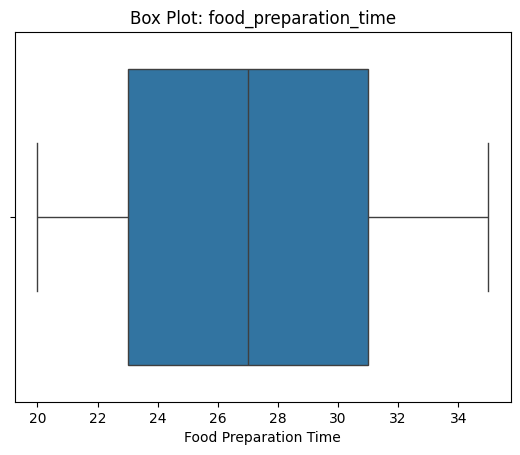

In [19]:
# food_preparation_time can be represented as a box plot

sns.boxplot(data=df, x=df.food_preparation_time)
plt.title('Box Plot: food_preparation_time')
plt.xlabel('Food Preparation Time');

The median food preparation time was 27 minutes. The distribution is relatively even, with no outliers on either side.

**delivery_time**

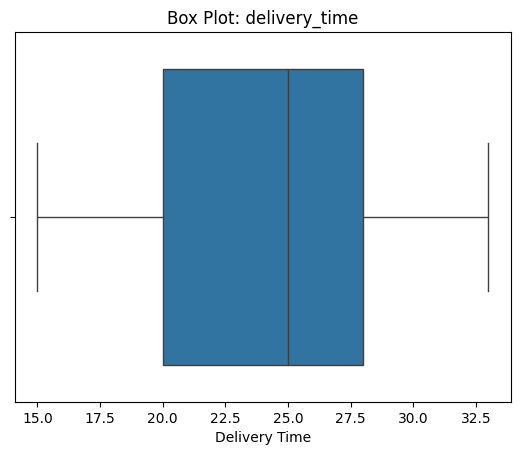

In [20]:
# delivery_time can be represented as a box plot

sns.boxplot(data=df, x=df.delivery_time)
plt.title('Box Plot: delivery_time')
plt.xlabel('Delivery Time');

The median delivery time was 25 minutes. Compared to preparation time, the distribution is skewed somewhat to the right, favoring shorter delivery times. Again, there are no outliers on either side.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# value_counts() can be used to show the number of orders
# receieved by each restaurant

df.restaurant_name.value_counts().nlargest(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


The top 5 restaurants were Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# loc function can be used to filter by 'Weekend'
# and then count values by 'cuisine_type'

df.loc[df.day_of_the_week=='Weekend','cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:


American cuisine was the most popular on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
# filter out rows where cost_of_the_order > 20
# use shape function to count the rows
# divide by total number of rows in the original dataframe
# convert to a percentage

round(df[df.cost_of_the_order>20].shape[0]/df.shape[0] * 100, 1)

29.2

#### Observations:


29.2% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# mean() function will provide the mean order delivery time

round(df.delivery_time.mean(),1)

24.2

#### Observations:


The mean delivery time was 24.2 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
# value_counts() function on customer_id will show
# the number of orders placed by each customer

df.customer_id.value_counts().nlargest(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


Customer 52832 placed the most orders with 13, followed by Customer 47440 with 10 and Customer 83287 with 9.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Overview of numeric variables**

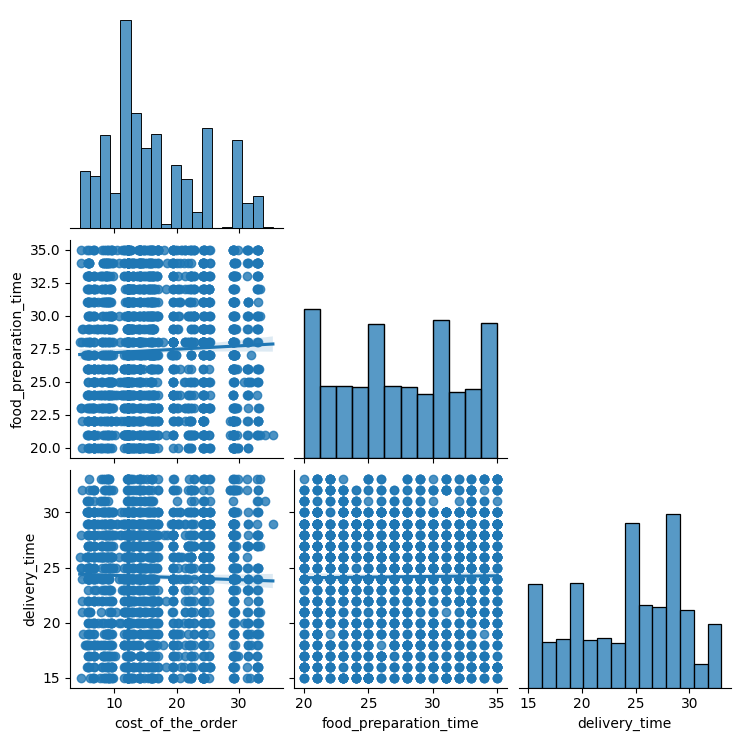

In [26]:
# using a pairplot will give a sense of
# any notable relationships between the 3 numeric variables

sns.pairplot(data=df[
    ['cost_of_the_order','food_preparation_time','delivery_time']],
      kind='reg',corner=True);

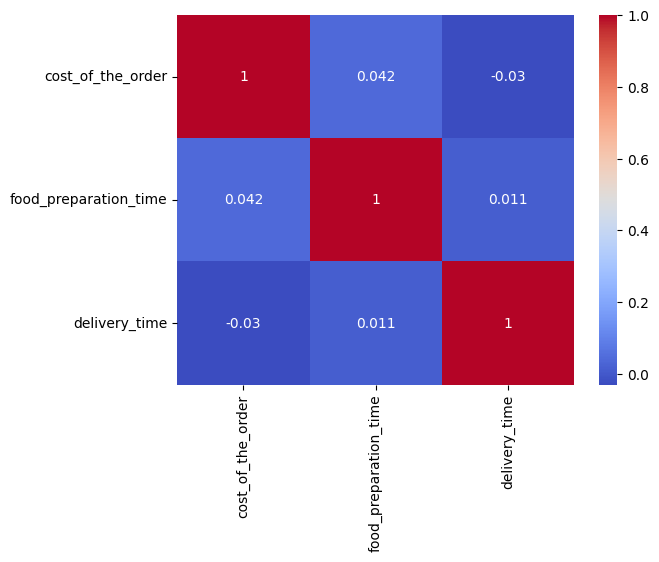

In [27]:
# a heatmap of correlations can provide a different view
# of the relationships represented above

sns.heatmap(data=df[[
    'cost_of_the_order','food_preparation_time','delivery_time']].corr(),
            cmap='coolwarm',annot=True);

*   From these views, we can observe that there is a slight positive relationship between food_preparation_time and cost_of_the_order, indicating that the restaurants may tend to charge higher prices for orders that take their staff longer to prepare. However, the correlation is relatively weak and not likely to be significant to our analysis.
*   delivery_time does not appear to be significantly correlated with either cost_of_the_order or food_preparation_time. This makes sense as the actions of the delivery person would most likely not be affected by the price or type of order they are delivering.



**cuisine_type vs. cost_of_the_order**

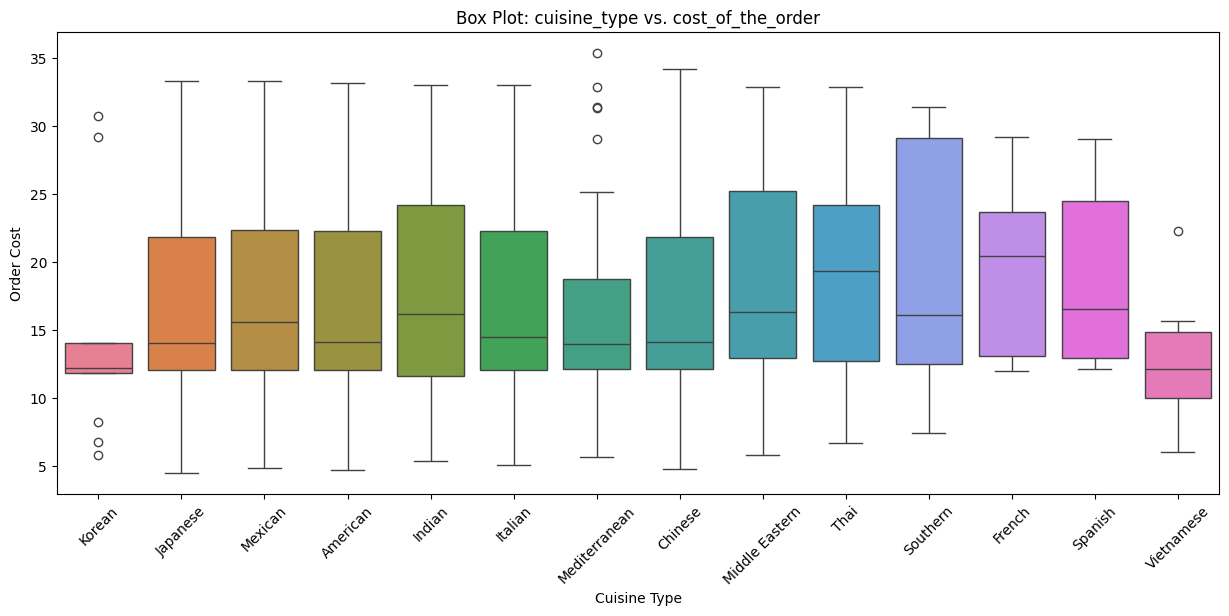

In [28]:
# we can use a box plot to view the relationship
# between order cost and cuisine type

plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.boxplot(data=df, x=df.cuisine_type, y=df.cost_of_the_order,
            hue=df.cuisine_type)
plt.title('Box Plot: cuisine_type vs. cost_of_the_order')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Cost');

In [29]:
df.cost_of_the_order.median()

14.14

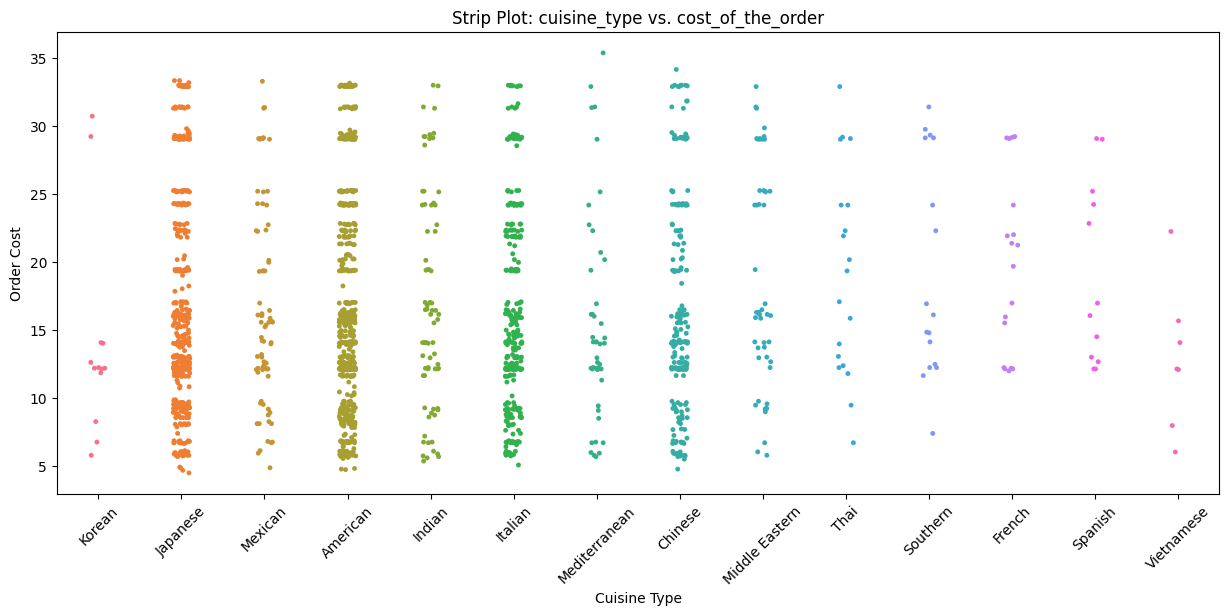

In [30]:
# a strip plot comparison of order cost by cuisine type
# can give a better view of the sample size for each category

plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.stripplot(data=df, x=df.cuisine_type, y=df.cost_of_the_order, hue=df.cuisine_type, size=3.5)
plt.title('Strip Plot: cuisine_type vs. cost_of_the_order')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Cost');



*   French and Thai cuisines have the highest median order price, but received a relatively low volume of orders compared to the more popular cuisines
*   Korean and Vietnamese cuisines have the lowest median order price, though in both cases the sample size might be too small to draw any reliable conclusions
*   The four most popular cuisines (American, Japanese, Italian, and Chinese) all have median order prices around 14 dollars, close to the overall median of 14.14. All four display a skewed distribution, with a clustering of orders towards the lower end of their price range. However, the high volume of orders would likely translate to higher revenue compared to cuisines that have a higher median price.







**restaurant_name vs. cost_of_the_order**

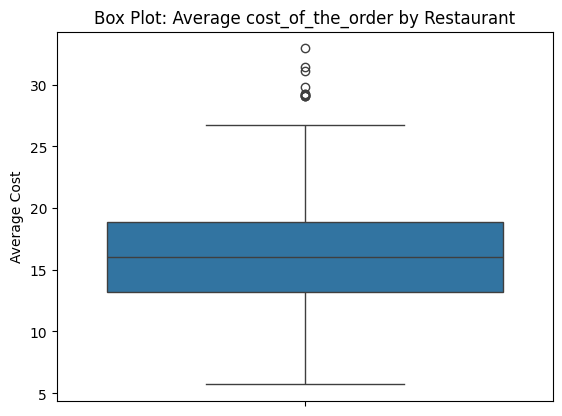

In [33]:
# calculates the average 'cost_of_the_order' by restaurant:

restaurant_avg = pd.DataFrame(df.groupby(['restaurant_name'])['cost_of_the_order'].mean()).copy()

# creates a box plot showing the distribution of average cost:

sns.boxplot(data=restaurant_avg, y=restaurant_avg.cost_of_the_order)
plt.title('Box Plot: Average cost_of_the_order by Restaurant')
plt.ylabel('Average Cost');

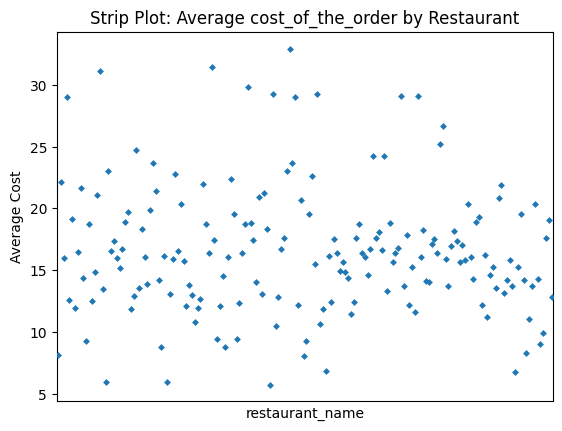

In [34]:
# creates a strip plot showing a different view
# of the same average price distribution:

sns.stripplot(data=restaurant_avg, y=restaurant_avg.cost_of_the_order,
              x=restaurant_avg.index, size=3.5, marker='D')
plt.xticks([])
plt.title('Strip Plot: Average cost_of_the_order by Restaurant')
plt.ylabel('Average Cost');

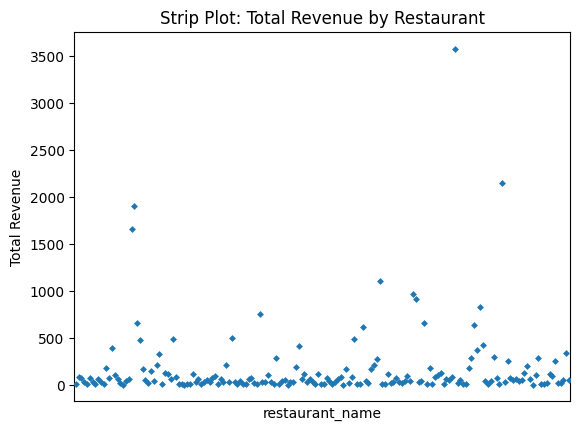

In [35]:
# calculates the total revenue generated by each restaurant
# by taking the sum of all orders:

restaurant_revenue = pd.DataFrame(df.groupby(['restaurant_name'])
['cost_of_the_order'].sum()).copy()

# creates a strip plot showing the distribution of total revenue:

sns.stripplot(data=restaurant_revenue, y=restaurant_revenue.cost_of_the_order,
              x=restaurant_revenue.index, size=3.5, marker='D')
plt.xticks([])
plt.title('Strip Plot: Total Revenue by Restaurant')
plt.ylabel('Total Revenue');


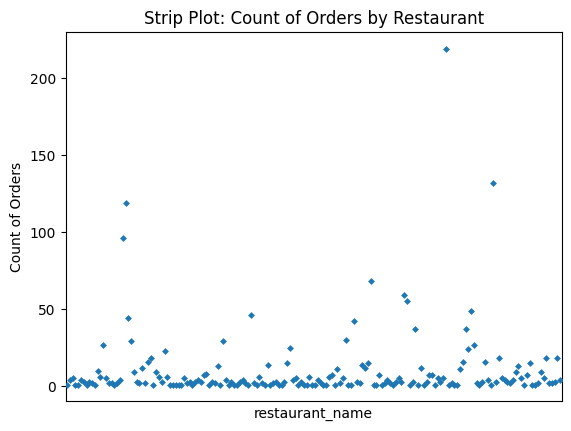

In [36]:
# calculates the volume of orders grouped by restaurant:

restaurant_orders = pd.DataFrame(df.groupby(['restaurant_name'])
['order_id'].count()).copy()

# creates a strip plot showing the distribution of order volume:

sns.stripplot(data=restaurant_orders, y=restaurant_orders.order_id, x=restaurant_revenue.index, size=3.5, marker='D')
plt.xticks([])
plt.title('Strip Plot: Count of Orders by Restaurant')
plt.ylabel('Count of Orders');

In [37]:
# takes the top 5 restaurants with the highest average price
 # (helps identify the outliers from the box plot above):

restaurant_avg.cost_of_the_order.sort_values(ascending=False).nlargest(5)

restaurant_name
Kambi Ramen House      32.930
Emporio                31.430
Bhatti Indian Grill    31.115
Haru Gramercy Park     29.830
Lucky Strike           29.250
Name: cost_of_the_order, dtype: float64

In [38]:
# takes the top 5 restaurants with the highest total revenue
 # (helps identify the outliers from the Total Revenue strip plot):

restaurant_revenue.cost_of_the_order.sort_values(ascending=False).nlargest(5)

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

In [39]:
# takes the top 5 restaurants with the highest order volume
 # (helps identify the outliers from the Order Volume strip plot):

restaurant_orders.order_id.sort_values(ascending=False).nlargest(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

In [40]:
# shows the average price of the top 5 most popular
# / highest revenue restaurants:

restaurant_avg.loc[['Shake Shack', 'The Meatball Shop',
                    'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']]

,cost_of_the_order
restaurant_name,
Shake Shack,16.344886
The Meatball Shop,16.251591
Blue Ribbon Sushi,15.999580
Blue Ribbon Fried Chicken,17.315521
Parm,16.364118



*   Based on the box plot above, the average order price by restaurant has a relatively symmetric distribution, with a median of around 15 dollars and a few outliers with averages around 30 dollars. The accompanying strip plot does not show significant clustering around any particular value.
*   When looking at total revenue, however, the strip plot shows that most restaurants generated under 100 dollars in revenue, with the 4 highest-earning restaurants standing out as clear outliers. The third strip plot, displaying the volume of orders by restaurant, displays a very similar pattern.
*   A comparison between the top 5 restaurants in terms of average order price and the top 5 restaurants with the highest revenue shows no overlap between the two lists of outliers. However, the list of restaurants generating the highest revenue overlaps completely with the list of restaurants fulfilling the most orders. This seems to suggest that order volume is a stronger indicator of profit than the pricing of individual orders.






**rating vs. cost_of_the_order**

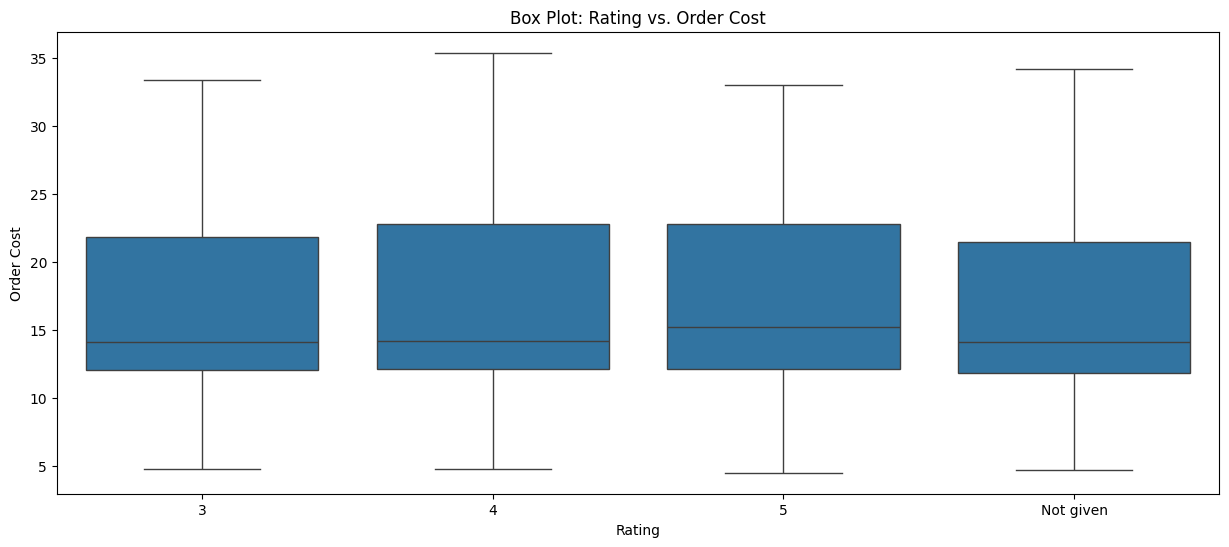

In [41]:
# creates a boxplot showing the distribution of order cost vs. rating:

plt.figure(figsize=(15, 6))
sns.boxplot(data=df,y=df.cost_of_the_order,
            x=df.rating,order=['3','4','5','Not given'])
plt.title('Box Plot: Rating vs. Order Cost')
plt.ylabel('Order Cost')
plt.xlabel('Rating');


Based on this view, the orders appear to be distributed very similarly regardless of rating, with no outliers. While the median for '5' rated orders is slightly higher than the others, the difference is relatively slight and probably not significant to our analysis. This indicates that cost does not tend to be a factor in the way customers rate their orders.

**rating vs. food_preparation_time / delivery_time**

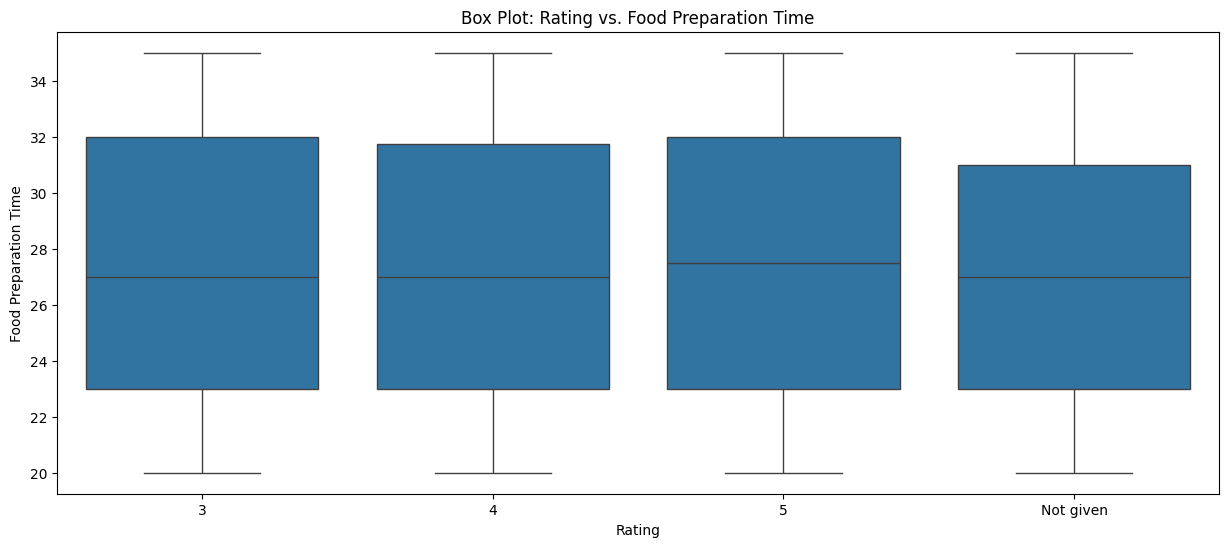

In [42]:
# creates a boxplot showing the distribution of food prep time vs. rating:

plt.figure(figsize=(15, 6))
sns.boxplot(data=df,y=df.food_preparation_time,
            x=df.rating,order=['3','4','5','Not given'])
plt.title('Box Plot: Rating vs. Food Preparation Time')
plt.ylabel('Food Preparation Time')
plt.xlabel('Rating');

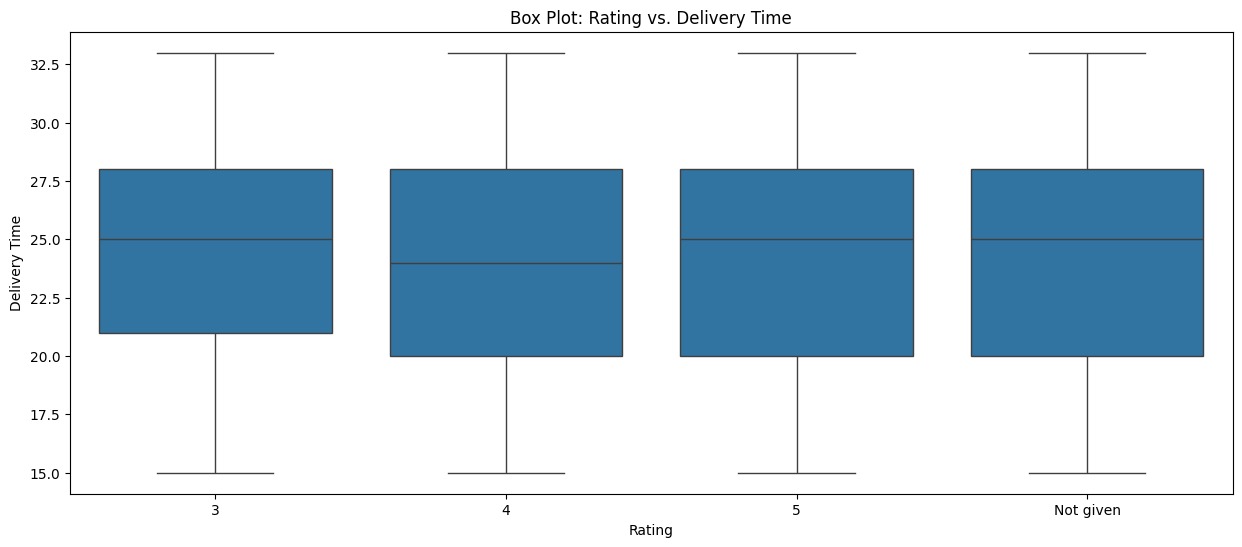

In [43]:
# creates a boxplot showing the distribution of delivery time vs. rating:

plt.figure(figsize=(15, 6))
sns.boxplot(data=df,y=df.delivery_time,
            x=df.rating,order=['3','4','5','Not given'])
plt.title('Box Plot: Rating vs. Delivery Time')
plt.ylabel('Delivery Time')
plt.xlabel('Rating');

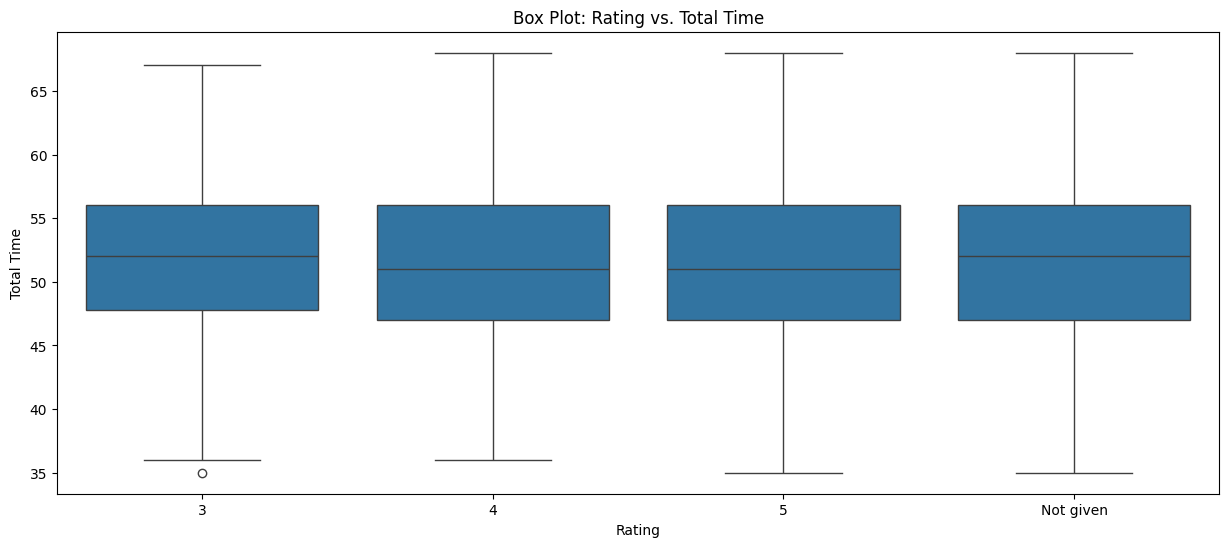

In [44]:
# creates a new column 'total_time'
# with the sum of 'food_preparation_time' and 'delivery_time':

df['total_time'] = df.food_preparation_time + df.delivery_time

# creates a boxplot showing the distribution of total time vs. rating:

plt.figure(figsize=(15, 6))
sns.boxplot(data=df,y=df.total_time,x=df.rating,order=['3','4','5','Not given'])
plt.title('Box Plot: Rating vs. Total Time')
plt.ylabel('Total Time')
plt.xlabel('Rating');

Based on these views, the orders were distributed similarly regardless of the time they took to reach the customer. While the medians of delivery time and total time were slightly higher for '3' rated orders, the difference is relatively small and likely not significant.

**delivery_time vs. day_of_the_week**

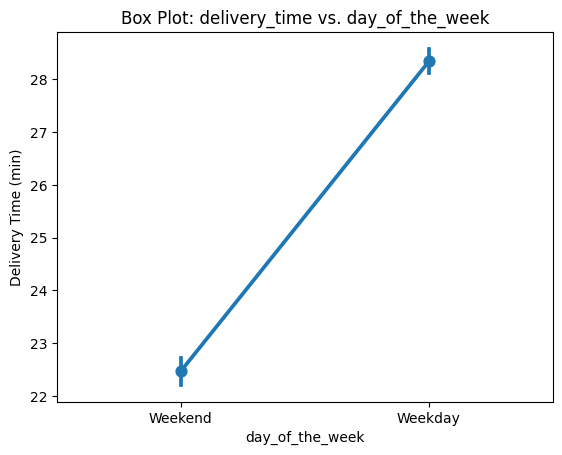

In [45]:
# creates a point plot showing the average delivery time on weekends vs. weekdays:

sns.pointplot(data=df, x=df.day_of_the_week, y=df.delivery_time)
plt.title('Box Plot: delivery_time vs. day_of_the_week')
plt.ylabel('Delivery Time (min)');

Based on this view, the average delivery time is significantly higher on weekdays compared to weekends. This could potentially be the result of rush hour traffic on weekdays coinciding with the time of day that more orders are received, or could also be because more delivery drivers are available to work on weekends. There is not enough evidence in the data to say for sure, but this relationship between delivery time and day of the week might be a potential source of revenue if investigated further.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [46]:
# create a copy of the dataset with unrated orders removed:

rated_orders = df[df.rating!='Not given'].copy()

# astype function converts 'rating' to the integer data type

rated_orders.rating = rated_orders.rating.astype(int)

# group 'rated_orders' by 'restaurant_name'
# to get the rating count and average for each restaurant
# pd.merge will create a dataframe 'overall_rating'
# where 'rating_x' is the rating count and 'rating_y' is the average for each restaurant

overall_rating = pd.merge(rated_orders.groupby(['restaurant_name'])['rating'].count(),
                          rated_orders.groupby(['restaurant_name'])['rating'].mean(),
                          on='restaurant_name')

# using loc function on 'overall_rating' can identify restaurants
# with 'rating_x' > 50 and 'rating_y' > 4

overall_rating.loc[(overall_rating.rating_x > 50)
 & (overall_rating.rating_y > 4)].sort_values(by='rating_x',ascending=False)


,rating_x,rating_y
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125


#### Observations:


Four restaurants have the ratings required to qualify for the promotional offer: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [47]:
# define a function to calculate the revenue from each order:

def revenue_calc(x):
  if x > 20:
    return x*.25
  elif x > 5:
    return x*.15
  else:
    return 0

# create a new column 'company_revenue'
# and apply the function above to 'cost_of_the_order' to calculate revenue:

df['company_revenue'] = df.cost_of_the_order.apply(revenue_calc)

# take the sum of 'company_revenue':

round(df.company_revenue.sum(),2)


6166.3

In [48]:
# example of alternate pricing structure (described in conclusion):

def revenue_calc2(x):
  if x > 20:
    return x*.15
  elif x > 5:
    return x*.25
  else:
    return 0

df2 = df.copy()
df2['company_revenue2'] = df.cost_of_the_order.apply(revenue_calc2)

round(df2.company_revenue2.sum(),2)

6342.53

In [49]:
# the new 'company_revenue' column allows us to
# see what percentage of revenue comes from each restaurant

round(df.groupby(['restaurant_name'])['company_revenue'].sum().nlargest(5) /
      df.company_revenue.sum() * 100,1)

restaurant_name
Shake Shack                  11.4
The Meatball Shop             6.8
Blue Ribbon Sushi             5.8
Blue Ribbon Fried Chicken     5.5
Parm                          3.5
Name: company_revenue, dtype: float64

#### Observations:


The company generated $6,166.30 in revenue across all orders. 11.4% of this revenue was generated from a single restaurant, Shake Shack.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [50]:
# the column 'total_time' was created previously using the following code:

# df['total_time'] = df.food_preparation_time + df.delivery_time

# filter out rows where 'total_time' > 60 and use shape function to count these rows
# divide by total number of rows in the original dataframe and convert to a percentage

round(df[df.total_time>60].shape[0]/df.shape[0] * 100, 1)

10.5

#### Observations:


10.5% of all orders took more than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [51]:
# mean() calculates mean delivery time on weekdays

round(df[df.day_of_the_week=='Weekday']['delivery_time'].mean(),1)

28.3

In [52]:
# mean() calculates mean delivery time on weekends

round(df[df.day_of_the_week=='Weekend']['delivery_time'].mean(),1)

22.5

#### Observations:


On average, delivery time on weekends is faster than weekdays by a difference of 5.8 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Out of the 178 restaurants partnered with FoodHub, the majority only fulfilled 1-10 orders over the recorded timeframe, while the top 4 restaurants fulfilled 90+ orders each
    * The most popular restaurant overall was Shake Shack, which generated 11.4% of the total revenue for FoodHub across this timeframe
* Twice as many orders were placed on weekends compared to weekdays, and the average delivery time on weekends was significantly faster. However, there is not enough evidence in the available data to account for this discrepancy in delivery time.
* The most popular cuisine types were American, Japanese, and Italian; however, this is likely a result of the disproportionate number of orders  fulfilled by the top 4 restaurants
* While some restaurants had an average order price of $30+, the highest revenue was generated from restaurants with an average order price between 16 and 17 dollars. As these restaurants were the most popular, a significant portion of orders delivered by FoodHub were within the 10-20 dollar price range
* Customer ratings were generally positive but did not provide much useful information for this analysis, perhaps due to the high number of unrated orders or other limitations of the data available

### Recommendations:

*  A significant portion of our revenue over this period was generated from Shake Shack, a well-known American chain restaurant. Although the average order cost of Shake Shack was half that of some other restaurants, they were able to generate a much greater share of revenue due to the volume of orders received. Going forward, we should consider partnering with similar chain restaurants in the area, as they will likely prove to be much more popular and generate more revenue compared to other local options.
*   More data would be useful to further investigate the discrepancy we observed between weekends and weekdays, in terms of order volume and delivery time. For example, collecting data on the specific time each order is placed might indicate that we receive more orders during rush hour traffic on weekdays, and we could then take steps to offer discounts that might increase our weekday order volume and revenue. Alternatively, we could collect data on the number of delivery drivers we have available on weekdays compared to weekends, and take steps to offer increased benefits to drivers who agree to work on weekdays, so that we are able to fulfill orders more efficiently. Although more information is needed to investigate the cause of this discrepancy, this could be a potential area to take advantage of to maximize our revenue.
* Our current pricing structure allows us to receive 25% on orders exceeding 20 dollars and 15% on orders exceeding 5 dollars. However, as the data shows, a large portion of our orders come from the 10-20 dollar range. Based on this, I would recommend altering our pricing structure in order to maximize our company revenue on orders within this price range, while deprioritizing the percentage taken from orders priced above 20. While this would require negotiations with each of our partner restaurants, a revised pricing structure could result in potential gains for FoodHub's net revenue.
*  Based on the data collected for this analysis, we were unable to identify any significant trends in the customer ratings that were provided. Our analysis indicates that customer opinions appear to be relatively unaffected by factors such as order cost and delivery time, but we may still be able to identify an underlying pattern if additional data is collected. One option might be to develop a survey that allows customers to submit more specific feedback, and offer a discount to encourage customers to complete the survey. This might provide a starting point on what data would be best to collect for further analysis. In any case, we should continue to collect customer feedback as their input will be key to improving FoodHub's business.



---